# Regression analysis

## Principle of regression

Supervised methods in ML includ classification (cf. titanic) and regression (cf. this exercise about house prices in Boston).

Regression = set of statistical methods helping us to find relationships between variables (predictors = covariates = features = independent variables; outcomes = response variables = dependent variables).

Example:

## Definition of the problem

The main goal of this exercise is to predict the sale prices for each house (in Boston) based on the different features provided in the dataset.

The data presented in this notebook come from the Kaggle website and report the features that we may want to consider for the exercise.

## Problematic

How to predict the sale prices for each house? Which would be the predicted prices for these houses?

## Resolution approaches

Regression -> Test different regression methods (linear, lasso, ridge, polynomial).

Metrics: RMSE

=> Logs : the distribution of the sale prices of the houses is exponential.

Exp(log) = linear

Log(Exp) = linear

=> Balancing the evaluation (otherwise, all sale prices of expensive houses would take the place of cheaper houses).

## Parameters

## Import modules and load files

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
train = pd.read_csv("../data/raw/house_prices/train.csv", sep = ",")
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test = pd.read_csv("../data/raw/house_prices/test.csv", sep = ",")
test.info()
test.head()

In [ ]:
sample = pd.read_csv("../data/raw/house_prices/sample_submission.csv", sep = ",")
sample.info()
sample.head()

In [3]:
train["MSSubClass"].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [4]:
train["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [5]:
train["LandContour"].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [6]:
for header in train.columns.values:
    print(header)
    print("Unique values:", train[header].unique())
    print("=============================")

Id
Unique values: [   1    2    3 ... 1458 1459 1460]
MSSubClass
Unique values: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning
Unique values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage
Unique values: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea
Unique values: [ 8450  9600 11250 ... 17217 13175  9717]
Street
Unique values: ['Pave' 'Grvl']
Alley
Unique values: [nan 'Grvl' 'Pave']
LotShape
Unique values: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour
Uniqu

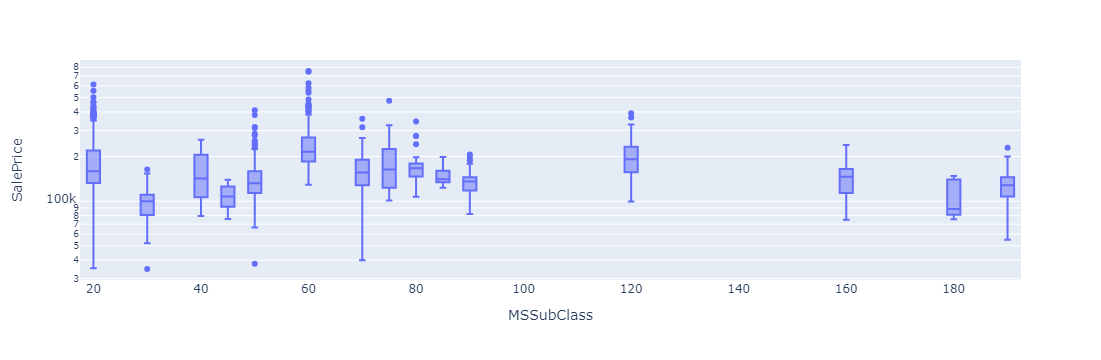

In [16]:
fig = px.box(train, x = "MSSubClass", y = "SalePrice", log_y = True)
fig.show()

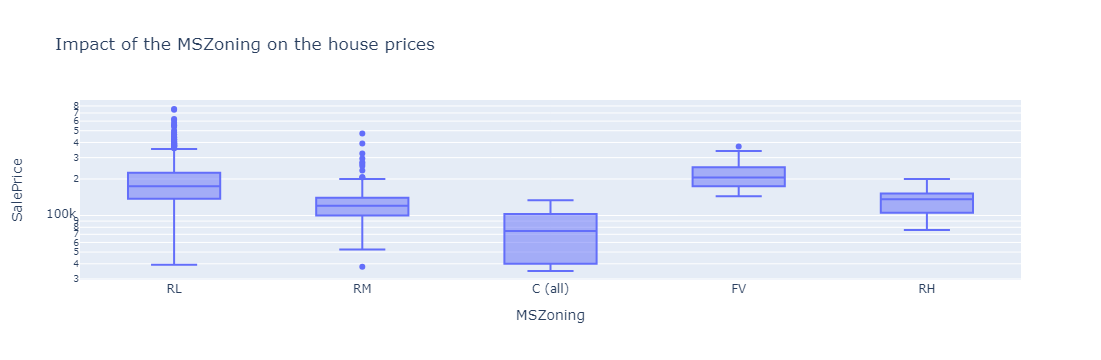

In [14]:
fig = px.box(train, x = "MSZoning", y = "SalePrice", title = "Impact of the MSZoning on the house prices", log_y=True)
fig.show()

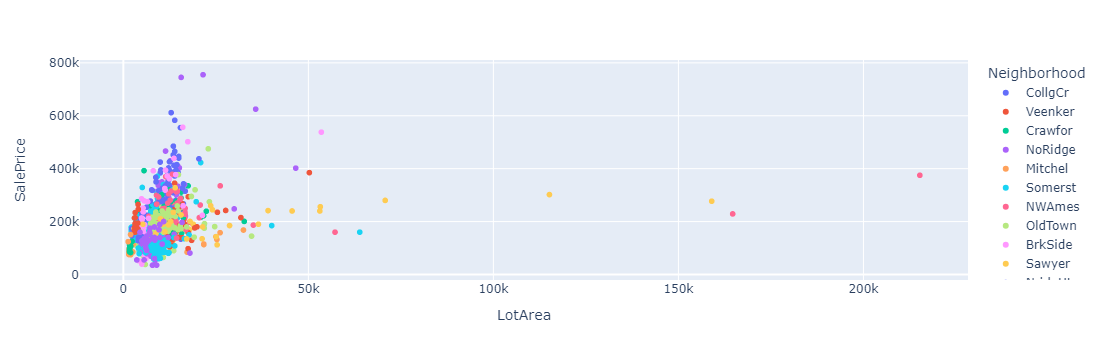

In [24]:
# LotFrontage and LotArea: continuous variables => Line plots or scatter plots
fig = px.scatter(train, x = "LotArea", y = "SalePrice", color = "Neighborhood")
fig.show()